**Clasificacion de Datos**

**Ing. Marcelo Saavedra**

**Ejemplo**

"Resolver el Problema de los Lirios de Fisher mediante Nayve Bayes y PCA
"

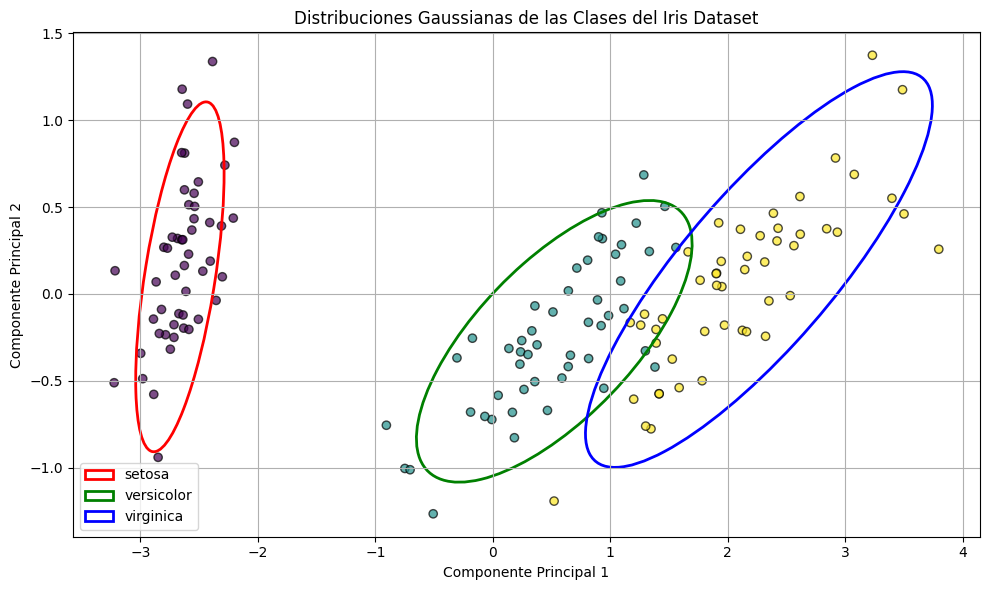

Matriz de confusión:
[[25  0  0]
 [ 0 23  2]
 [ 0  7 18]]
Precisión: 0.88


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
from sklearn.metrics import confusion_matrix, accuracy_score

# =========================
# Función para dibujar elipses
# =========================
def plot_ellipse(mean, cov, ax, label, color, scale=2):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 2 * scale * np.sqrt(eigenvalues)  # ±2σ para visibilidad
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor=color, facecolor='none', lw=2, label=label)
    ax.add_patch(ellipse)

# =========================
# Cargar dataset Iris
# =========================
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names
colors = ['r', 'g', 'b']

# =========================
# PCA a 2D
# =========================
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# =========================
# Dividir train/test
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.5, random_state=42, stratify=y
)

# =========================
# Entrenar GaussianNB
# =========================
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# =========================
# Graficar elipses
# =========================
fig, ax = plt.subplots(figsize=(10,6))

# Scatter de puntos
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)

# Dibujar elipses para cada clase
for i, color, label in zip([0,1,2], colors, labels):
    data = X_train[y_train == i]
    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=False)
    plot_ellipse(mean, cov, ax, label, color, scale=2)

# Leyenda y títulos
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Distribuciones Gaussianas de las Clases del Iris Dataset')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# =========================
# Matriz de confusión y precisión
# =========================
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Matriz de confusión:")
print(confusion)
print(f"Precisión: {accuracy:.2f}")
